In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sinusoid(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase = 0.0): 
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.cos(2*np.pi*freq *t+phase)
    return data

def STFT(signal, w, h):
    #zero padding
    missing = w - (len(signal) % w)
    np.append(signal, np.zeros(missing))
    
    output = []
    
    i = 0
    for s in np.arange(0, len(signal)-w, h):
        frame = signal[int(s):int(s+w)] * np.hanning(w)
        output.append(np.fft.fft(frame))
        i += 1
        
    return output

def ISTFT(windows, h):
    #implement this fxn!
    for window in windows:
        np.fft.ifft(window)
    
def PhaseDiffs(data, binNum):
    phaseDiffs = np.zeros(len(windows)-1)
    for i in range(0,len(windows)-1):
        p0 = np.angle(data[i][binNum])
        p1 = np.angle(data[i+1][binNum])

        diffRaw = p1-p0

        if diffRaw < -np.pi:
            diffRaw += 2*np.pi
        elif diffRaw > np.pi:
            diffRaw -= 2*np.pi

        phaseDiffs[i] = diffRaw/np.pi
    return phaseDiffs

def calculateFreq(binNum, phaseDiff):
    centerFreq_omega = fund_omega*binNum
    centerFreq = fund*binNum
    cyclesPerHop = centerFreq_omega * hopSize
    calcFreq = (cyclesPerHop + phaseDiff/2)/cyclesPerHop * centerFreq

    return(calcFreq)

0.29906502442411087


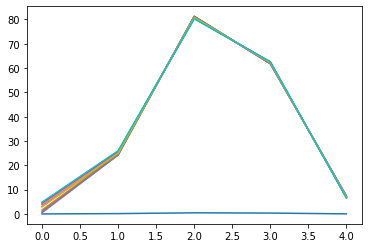

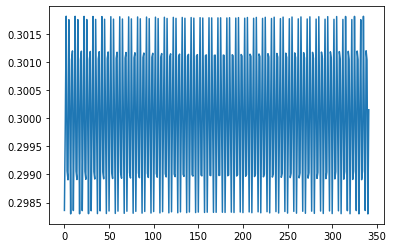

In [3]:
windowSize = 256
hopSize = windowSize/2

fund = 1/windowSize*44100
fund_omega = 1/windowSize
coeff = 2.3

sine = sinusoid(fund * coeff)
windows = STFT(sine, windowSize, hopSize)

for w in range(0,len(windows)):
    for k in range(0,len(windows[0])):
        windows[w][k] = 0

'''
phaseDiffs = PhaseDiffs(windows, 2)

for w in range(1,len(windows)):
    for k in range(0,len(windows[0])):
        windows[w][k] = calculateFreq(windows[w][k], phaseDiffs[w-1])


#for i in range(0,4):
  #  plt.plot(np.angle(windows[i][0:5]))
    
for i in range(0,10):
    plt.plot(np.abs(windows[i][0:5])/windowSize*2)
    

plt.figure()
plt.plot(phaseDiffs)

print(phaseDiffs[3])
'''



        
